----

#TPN°3: Aprendizaje Supervisado y No Supervisado

##Mentoría 10: ¿Cómo vivimos las y los argentinos? Relación entre hábitos de vida, alimentación y prevalencia de las principales enfermedades no transmisibles.

###Integrantes:
* Antonel, Maximiliano
* Caullo, María Laura
* Juárez, Victor Manuel
* Gomez, Camila

---


*1. Seleccionar una enfermedad no transmisible para la cual sea posible construir un modelo
que permita predecir si una persona puede poseerla o no de acuerdo a los atributos que se
encuentran en el dataset.*

In [ ]:
# Importacion de librerias

# Básicas
import pandas as pd
import numpy as np


#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Entrenamiento y métricas
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import neural_network
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import GlorotNormal
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Cargamos la base curada
url="https://raw.githubusercontent.com/camilaselene/DIPLO/main/data_completo_mean.csv"

In [ ]:
#Definimos el dataset y lo importamos
df=pd.read_csv(url)
df.head(3)

,Unnamed: 0,cant_componentes,bhih01,bhch04,biaf01,biaf03,biaf05,biaf06_m,biaf07_m,biha03,...,control_diabetes_99,bipc03,hta_nofumadores,imc_categorias_bima,bita04,findrisc,bidi01,bidi02,bidi05,Target
0,0,0.071429,0.119048,0.162791,0.571429,0.571429,1.0,0.057654,0.331241,3.0,...,0.0,2.0,2.0,3.0,3.0,2.0,No Diabetes (No),NaN,NaN,0
1,1,0.142857,0.095238,0.546512,0.428571,0.142857,1.0,0.033797,0.414923,3.0,...,0.0,1.0,1.0,2.0,3.0,NaN,No Diabetes (No),NaN,NaN,0
2,2,0.071429,0.095238,0.174419,0.000000,0.428571,1.0,0.051690,0.373082,3.0,...,0.0,2.0,1.0,2.0,3.0,NaN,No Diabetes (No),NaN,NaN,0


In [ ]:
df = df.drop(columns='Unnamed: 0') #dropeamos
df.head(3)

,cant_componentes,bhih01,bhch04,biaf01,biaf03,biaf05,biaf06_m,biaf07_m,biha03,imc,...,control_diabetes_99,bipc03,hta_nofumadores,imc_categorias_bima,bita04,findrisc,bidi01,bidi02,bidi05,Target
0,0.071429,0.119048,0.162791,0.571429,0.571429,1.0,0.057654,0.331241,3.0,0.379641,...,0.0,2.0,2.0,3.0,3.0,2.0,No Diabetes (No),NaN,NaN,0
1,0.142857,0.095238,0.546512,0.428571,0.142857,1.0,0.033797,0.414923,3.0,0.266655,...,0.0,1.0,1.0,2.0,3.0,NaN,No Diabetes (No),NaN,NaN,0
2,0.071429,0.095238,0.174419,0.000000,0.428571,1.0,0.051690,0.373082,3.0,0.134837,...,0.0,2.0,1.0,2.0,3.0,NaN,No Diabetes (No),NaN,NaN,0


In [ ]:
df.columns

Index(['cant_componentes', 'bhih01', 'bhch04', 'biaf01', 'biaf03', 'biaf05',
       'biaf06_m', 'biaf07_m', 'biha03', 'imc', 'bial02', 'bial03', 'bial04',
       'bial05', 'bial06', 'bial07', 'promedio_fv_diario', 'bica03_01',
       'promedio_sistolica', 'promedio_diastolica', 'bima07', 'bima10',
       'imc_bima', 'bimq05', 'bimq06', 'bhch03_1', 'bhch03_2',
       'nivel_instruccion_agrupado_1', 'nivel_instruccion_agrupado_2',
       'nivel_instruccion_agrupado_3', 'cobertura_salud_1',
       'cobertura_salud_2', 'condicion_actividad_1', 'condicion_actividad_2',
       'condicion_actividad_3', 'nivel_actividad_fisica_1.0',
       'nivel_actividad_fisica_2.0', 'nivel_actividad_fisica_3.0',
       'consumo_tabaco_100_1', 'consumo_tabaco_100_2', 'consumo_tabaco_100_3',
       'bipc01_1', 'bipc01_2', 'bipc01_99', 'imc_categorias_1',
       'imc_categorias_2', 'imc_categorias_3', 'imc_categorias_99', 'bial01_1',
       'bial01_2', 'bial01_99', 'bico03_1', 'bico03_2', 'bico03_99',
       '

In [ ]:
df.shape

(29224, 73)

# Descripción de las variables
*   Cantidad de miembros del hogar (cant_componentes)
*   Monto del ingreso total mensual del hogar en pesos (bhih01)
*   Edad en años cumplidos (bhch04)
*   Actividad fisica (biaf01)
*   Las actividades físicas moderadas son aquellas que le implican una ligera aceleración del ritmo cardiaco y la respiración. En la última semana, cuántos días realizó actividades físicas moderadas, durante al menos 10 minutos? (puede incluir caminata rapida) [Días por semana] (biaf03)
*   En los días de la semana en que usted realiza este tipo de actividades, ¿cuánto tiempo en total emplea en realizarlas?  [En minutos semanales] (biaf04_m)
*   En la última semana, ¿cuántos días caminó, durante al menos 10 minutos? [Días por semana] (biaf05)
*   En los días de la semana en que usted realiza este tipo de actividad, ¿cuánto tiempo en total emplea en realizarla? [En minutos semanales] (biaf06_m)
*   Habitualmente, ¿cuánto tiempo por día pasa sentado, por ejemplo en su casa, en el trabajo, o en clase?  [En minutos diarios (biaf07_m")
*   Indice de masa corporal por autorreporte (imc)
*   En una semana típica, ¿cuántos días come usted frutas frescas, cocidas, en jugos o licuados naturales? (bial03)
*   En una semana típica, ¿cuántas porciones de frutas come en uno de esos días? [Porciones por día] (bial04)
*   En una semana típica, ¿cuántos días come usted verduras? (bial05)
*   ¿Cuántas porciones de fruta come en uno de esos días? [Porciones por día] (bial06)
*   Promedio de consumo diario de frutas o verduras [Cantidad en porciones] (promedio_fv_diario)
*   ¿Con qué frecuencia tomó alguna bebida alcohólica en los últimos 30 días? [Días por semana] (bica03_01)
*   Promedio de las dos últimas mediciones de tensión sistólica (promedio_sistolica)
*   Promedio de las dos últimas mediciones de tensión diastólica (promedio_diastolica)
*   Medición de la altura en centímetros (bima07)
*   Medición del peso en kilogramos (bima10)
*   Índice de masa corporal según mediciones antropométricas (imc_bima)
*   Registre los valores de glucosa que le informe el personal de Salud [Medición en mg/dl]  (bimq05)
*   Registre los valores de colesterol que le informe el personal de Salud [Medición en mg/dl] (bimq06)
* Sexo  (bhch03)
* Nivel de instrucción agrupado (nivel_instruccion_agrupado)
* Cobertura de salud (cobertura_salud)
*	Condición de actividad  (condicion_actividad)
*	Nivel de actividad física (nivel_actividad_fisica)
*	Condición de fumador (consumo_tabaco_100)
* En el último año ¿un médico, un enfermero u otro profesional de la salud le ha dicho que tiene que bajar de peso? (bipc01)
* Indice de masa corporal agrupado por autorreporte imc_categorias
* Habitualmente, ¿le agrega sal a las comidas durante la cocción? (bial01)
* ¿Alguna vez un médico, un enfermero u otro profesional de la salud le dijo que tenía el colesterol alto? (bico03)


La enfermedad no transmisible seleccionada es **diabetes**. Utilizaremos la variable `Target` creada en el TP anterior que resulta de la combinación de las variables  `findrisc` y `bidi01`, y sus resultados pueden ser:
* 0= No riesgo no diabetes (no padece la enfermedad y no tiene riesgo de padecerla)
* 1= Riesgo (no padece la enfermedad pero tiene riesgo alto de contraer la enfermedad)
* 2= Diabetes si (padece la enfermedad)

*2. Descubrir cuáles son los atributos que más interdependencia tienen para la enfermedad
no transmisible que hayan seleccionado.*

## Visualizaciones


---



**Sexo y Edad**

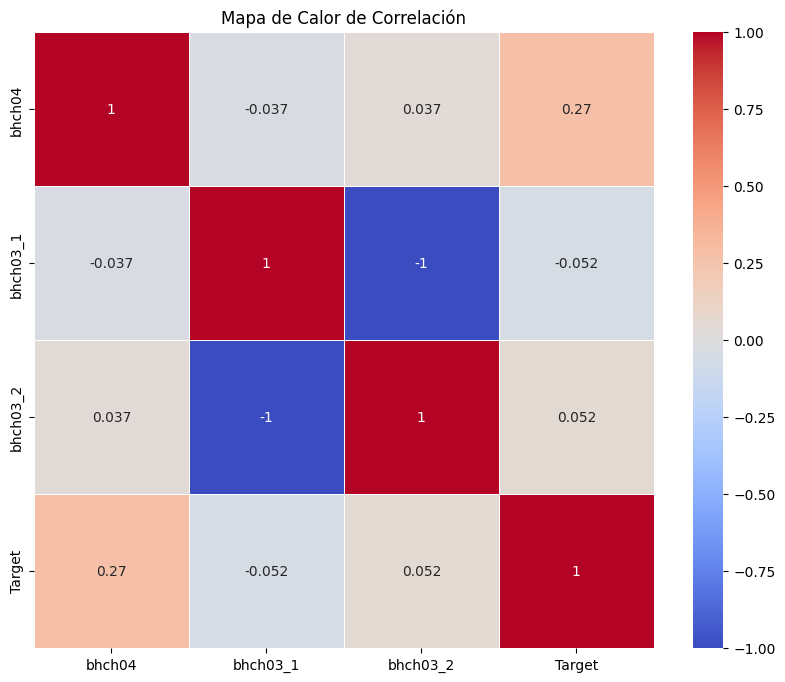

In [ ]:
# Matriz de correlación
# Selecciona las columnas de interés
Hábitos_Actividad_Física= ["bhch04",'bhch03_1', 'bhch03_2',
                           "Target"]
datos_de_interes = df[Hábitos_Actividad_Física]

# Calcula la matriz de correlación
matriz_de_correlacion = datos_de_interes.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Personaliza el título del mapa de calor
plt.title('Mapa de Calor de Correlación')

# Muestra el mapa de calor
plt.show()

**Sexo**
* `bhch03_1`: Varon---0:No 1:Si


In [ ]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['bhch03_1'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target            0          1          2
bhch03_1                                 
0.0       69.149832  16.450216  14.399952
1.0       74.412325  13.445044  12.142630


Dentro de la poblacion femenina tenemos que el 69,14% NO padece diabetes.
Dentro de la poblacion masculina tenemos que el 74.41% NO padece diabetes.
Se intuye que la diabetes tiene una distribucion distinta en varones y en mujeres, teniendo mayor porcentaje de diagnostico positivo en las mujeres (14,39%) que en hombres (12,14%)

In [ ]:
# Calcular la tabla de contingencia en porcentajes respecto a las columnas
contingency_table_porcentajes_columnas = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Mostrar la tabla de contingencia en porcentajes con respecto a las columnas
print(contingency_table_porcentajes_columnas)

Target           0          1          2
bhch03_1                                
0.0       55.10517  61.774667  61.034659
1.0       44.89483  38.225333  38.965341


Dentro de la poblacion en estudio, analizando a las personas con diabetes y con riesgo de padecerla, tenemos que hay mayor porcentaje de mujeres.

**Edad**

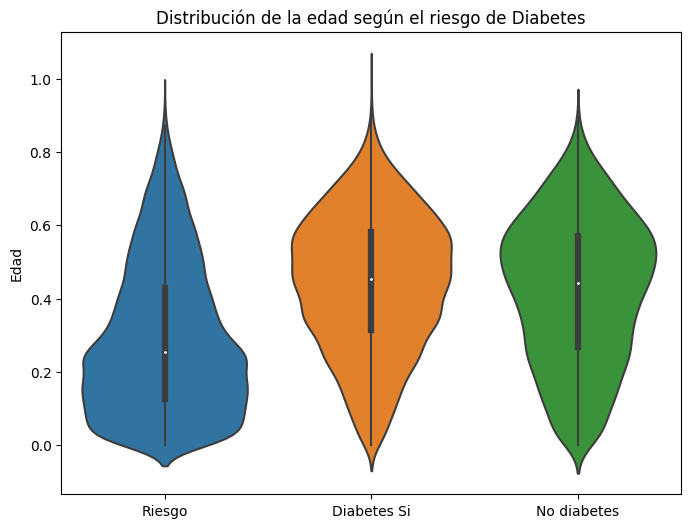

In [ ]:
# Gráfico de violín (violin plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Target', y='bhch04', data=df)
plt.xlabel('')
plt.xticks([0, 1, 2], ['Riesgo', 'Diabetes Si', 'No diabetes'])
plt.ylabel('Edad')
plt.title('Distribución de la edad según el riesgo de Diabetes')
plt.show()

A medida que aumenta la edad aumenta la cantidad de gente diagnosticada y con riesgo de padecer diabetes

**Relación entre los hábitos que poseen los encuestados, medidas de imc, indicaciones médicas, etc.**   

Decidimos agrupar las variables en distintos grupos para realizar el análisis de manera mas detallada con respecto a la variable Target.

**Actividad Física**

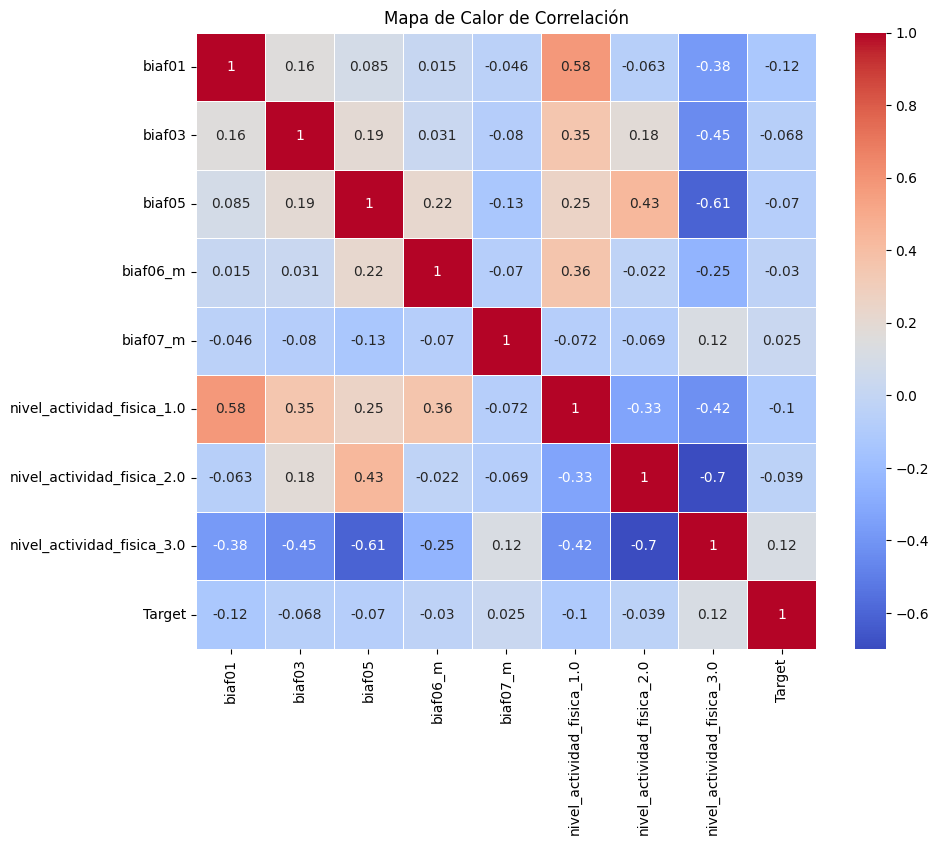

In [ ]:
# Matriz de correlación
# Selecciona las columnas de interés
Hábitos_Actividad_Física= ["biaf01", "biaf03", "biaf05", "biaf06_m", "biaf07_m",
                           "nivel_actividad_fisica_1.0","nivel_actividad_fisica_2.0","nivel_actividad_fisica_3.0",
                           "Target"]
datos_de_interes = df[Hábitos_Actividad_Física]

# Calcula la matriz de correlación
matriz_de_correlacion = datos_de_interes.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Personaliza el título del mapa de calor
plt.title('Mapa de Calor de Correlación')

# Muestra el mapa de calor
plt.show()

Del análisis de correlación elegimos las variables que mas se acerquen a 1 (o -1), ya que son las que mayor relación van a tener con la variable Target

Nivel de actividad fisica:
* 1 Alto (`nivel_actividad_fisica_1.0`) **0:No 1:Si**
* 2 Medio (`nivel_actividad_fisica_2.0`) **0:No 1:Si**
* 3 Bajo (`nivel_actividad_fisica_3.0`) **0:No 1:Si**

Se decidió analizar la variable  nivel de actividad física BAJO

In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['nivel_actividad_fisica_3.0'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target                              0          1          2
nivel_actividad_fisica_3.0                                 
0.0                         77.082794  11.636481  11.280724
1.0                         65.053763  19.107817  15.838419


De los encuestados que NO tienen un nivel de actividad física BAJO el 11,28% padece de DIABETES y de los que SI tienen un nivel BAJO el15,83% padece diabetes.

In [ ]:
##Analisis por COLUMNAS
# Calcular la tabla de contingencia en porcentajes respecto a las columnas
contingency_table_porcentajes_columnas = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Mostrar la tabla de contingencia en porcentajes con respecto a las columnas
print(contingency_table_porcentajes_columnas)

Target                              0         1          2
nivel_actividad_fisica_3.0                                
0.0                         57.098366  40.61865  44.444444
1.0                         42.901634  59.38135  55.555556


Cuando analizamos los porcentajes acumulados dentro de la variable Target, de los encuestados que tienen diabetes y los que tienen riesgo de padecer la enfermedad hay un mayor porcentaje de personas que tienen un nivel de actividad física bajo.



`biaf01`: Cuantos dias a la semana realiza actividades fisicas intensas por al menos 10 minutos.
* La variable esta normalizada de 0-1

In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['biaf01'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target            0          1          2
biaf01                                   
0.000000  67.825820  17.176811  14.997369
0.142857  81.036514  10.129564   8.833922
0.285714  81.925344   9.037328   9.037328
0.428571  85.039370   8.241470   6.719160
0.571429  85.741811   6.936416   7.321773
0.714286  87.685291   5.473204   6.841505
0.857143  89.219331   4.460967   6.319703
1.000000  82.489451   7.383966  10.126582


Se observa que de los encuestados que realizan actividades físicas intensas 7 días a la semana el 82,48% no tienen diabetes mientras que el 10% si padece la enfermedad. Por el contrario, de las personas que no están realizando actividades intensas por al menos 10 minutos el 67.82% no padece la enfermedad, un 17% tiene riesgo de padecer diabetes y un 14% si padece la misma.

In [ ]:
##Analisis por COLUMNAS
# Calcular la tabla de contingencia en porcentajes respecto a las columnas
contingency_table_porcentajes_columnas = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Mostrar la tabla de contingencia en porcentajes con respecto a las columnas
print(contingency_table_porcentajes_columnas)

Target            0          1          2
biaf01                                   
0.000000  74.107613  88.439828  87.155963
0.142857   3.296440   1.941748   1.911315
0.285714   5.993963   3.115828   3.516820
0.428571   7.761966   3.544818   3.261978
0.571429   2.132145   0.812825   0.968400
0.714286   3.684538   1.083766   1.529052
0.857143   1.149921   0.270942   0.433231
1.000000   1.873413   0.790246   1.223242


Analizando por la variable Target podemos observar que de las personas que tienen riesgo o que padecen de diabetes un mayor porcentaje no está realizando actividades intensas por al menos 10 minutos con respecto a las que no padecen la enfermedad.

---



# **Índice de masa corporal (IMC)**

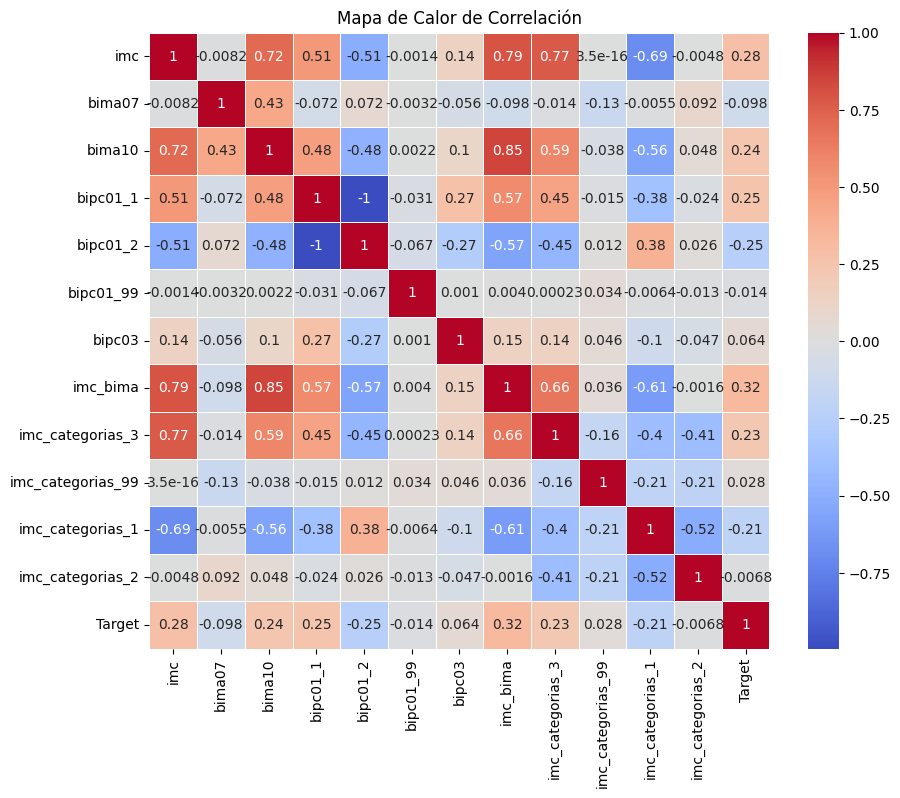

In [ ]:
# Matriz de correlación
# Selecciona las columnas de interés
IMC_Peso_Altura=["imc", "bima07", "bima10", "bipc01_1","bipc01_2","bipc01_99", "bipc03", "imc_bima",
                 "imc_categorias_3","imc_categorias_99","imc_categorias_1","imc_categorias_2", "Target"]
datos_de_interes_2 = df[IMC_Peso_Altura]

# Calcula la matriz de correlación
matriz_de_correlacion = datos_de_interes_2.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Personaliza el título del mapa de calor
plt.title('Mapa de Calor de Correlación')

# Muestra el mapa de calor
plt.show()

Nuevamente, del análisis de correlación elegimos las variables que mayor relación tienen con la variable Target

`imc`: Indice de masa corporal por autoreporte, variable númerica normalizada.

<Figure size 800x600 with 0 Axes>

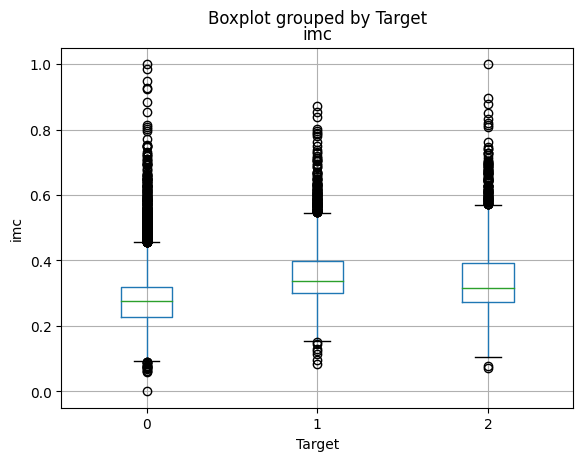

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='imc', by='Target')

plt.xlabel('Target')
plt.ylabel('imc')

plt.show()

Podemos observar que la media de los reportes de IMC es mayor para los pacientes con diabetes o con riesgo de padecerla que para los pacientes con menor riesgo.

`bima10`: Peso en kg. por mediciones antropométricas, variable numerica normalizada.

<Figure size 800x600 with 0 Axes>

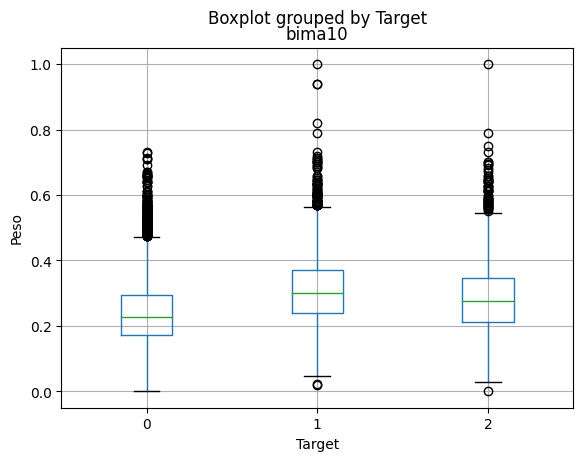

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='bima10', by='Target')

plt.xlabel('Target')
plt.ylabel('Peso')

plt.show()

Como se esperaba las medias de la variable peso se comportan igual que la variable imc por autoreporte.

`'imc_bima'`: Índice de masa corporal según mediciones antropométricas, variable númerica normalizada.  

<Figure size 800x600 with 0 Axes>

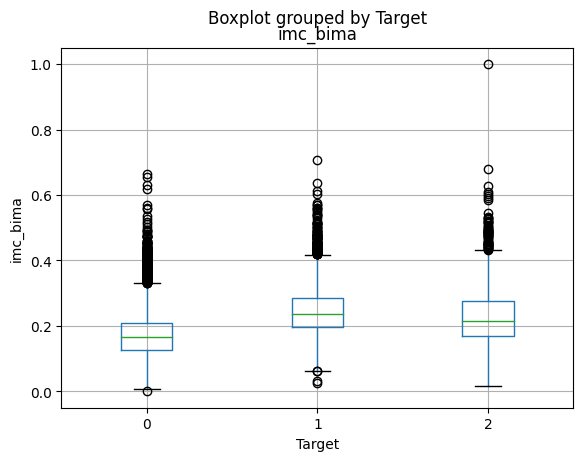

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='imc_bima', by='Target')

plt.xlabel('Target')
plt.ylabel('imc_bima')

plt.show()

Conforme con lo esperado las medias de los valores de imc medidos son mayores para las personas con riesgo y personas diagnosticadas de diabetes.

`bipc01`: En el último año ¿un médico, un enfermero u otro profesional de la salud le ha dicho que tiene que bajar de peso?
* `bipc01_1`: Si --- 0:No 1:Si
* `bipc01_2`: No
* `bipc01_99`: Ns/Nc

In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['bipc01_1'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target            0          1          2
bipc01_1                                 
0.0       79.603683  11.043835   9.352482
1.0       53.712121  24.047619  22.240260


De los encuestados que ningún profesional de la salud le indico que tenía que bajar de peso el 24,01% tiene riego de diabetes y el 22,24% tiene diabetes.

`imc_categorias`: Indice de masa corporal agrupado por autorreporte.
* `imc_categorias_1`: Bajo--- 0:No 1:Si
* `imc_categorias_2`: Medio--- 0:No 1:Si
* `imc_categorias_3`: Alto--- 0:No 1:Si
* `imc_categorias_99`: Ns/Nc--- 0:No 1:Si

Analizamos solo la variable imc_categorias_3

In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['imc_categorias_3'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target                    0          1          2
imc_categorias_3                                 
0.0               78.065358  11.010083  10.924559
1.0               50.342466  28.296233  21.361301


De los encuestados que tienen un imc alto el 28,29% tienen riego de tener diabetes y el 21,36% tiene diabetes.


---



**Glucosa-Colesterol-Tensión arterial**

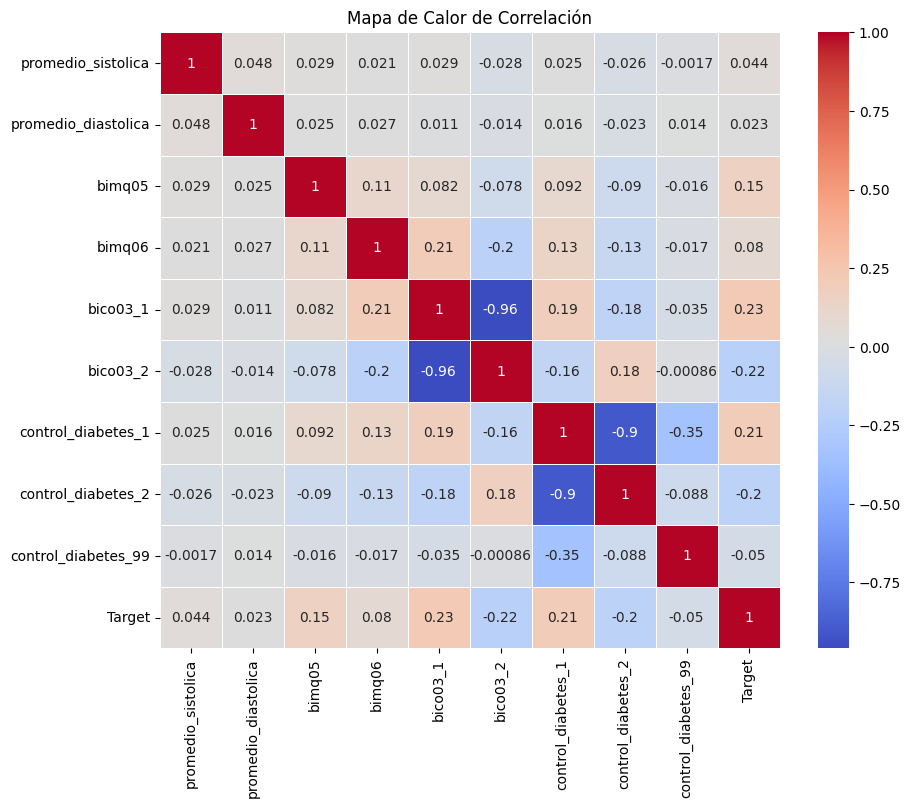

In [ ]:
# Matriz de correlación
# Selecciona las columnas de interés
HTA_COLESTEROL_GLUCOSA=["promedio_sistolica", "promedio_diastolica", "bimq05",
                        "bimq06", "bico03_1","bico03_2", "control_diabetes_1",
                        "control_diabetes_2","control_diabetes_99","Target"]
datos_de_interes_3 = df[HTA_COLESTEROL_GLUCOSA]

# Calcula la matriz de correlación
matriz_de_correlacion = datos_de_interes_3.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Personaliza el título del mapa de calor
plt.title('Mapa de Calor de Correlación')

# Muestra el mapa de calor
plt.show()

`bimq05`: Valores de glucosa informados por el personal de Salud [Medición en mg/dl], variable númerica normalizada

<Figure size 800x600 with 0 Axes>

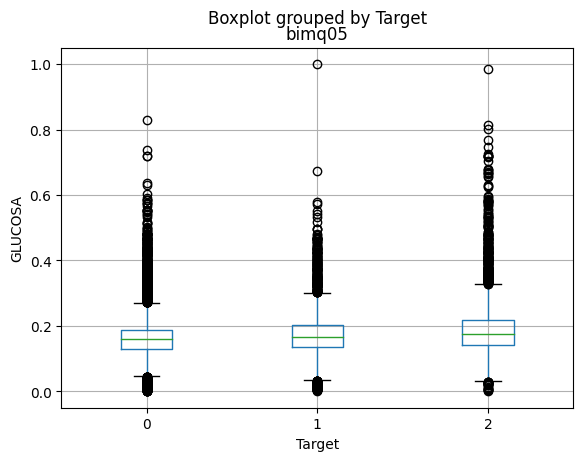

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='bimq05', by='Target')

plt.xlabel('Target')
plt.ylabel('GLUCOSA')

plt.show()

Podemos ve como la media de las mediciones aumenta cuando los pacientes tienen riesgo o padecen la enfermedad.

`bico03`: ¿Alguna vez un médico, un enfermero u otro profesional de la salud le dijo que tenía el colesterol alto?
* `bico03_1`:Si--- 0:No 1:Si
* `bico03_2`:No--- 0:No 1:Si

In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['bico03_1'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target            0          1          2
bico03_1                                 
0.0       76.419596  13.685916   9.894488
1.0       53.517155  20.413599  26.069246


De las personas que alguna vez algún profesional de la salud les dijo que tenían el colesterol ALTO el 20,41% tiene riego de padecer de diabetes y el 26,06% tiene la enfermedad.

`control_diabetes`: Medición de la glucemia/azúcar en sangre alguna vez por autorreporte
* `control_diabetes_1`: Si--- 0:No 1:Si
* `control_diabetes_2`: No--- 0:No 1:Si
* `control_diabetes_99`: Ns/Nc--- 0:No 1:Si

In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['control_diabetes_1'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target                      0          1          2
control_diabetes_1                                 
0.0                 87.260551  11.477963   1.261486
1.0                 66.956102  16.190852  16.853046


De los encuestados que se midieron la glucosa alguna vez el 16,19% tienen riego de tener diabetes y el 16,85% tiene diabetes

**Habitos de alimentación de los encuestados**

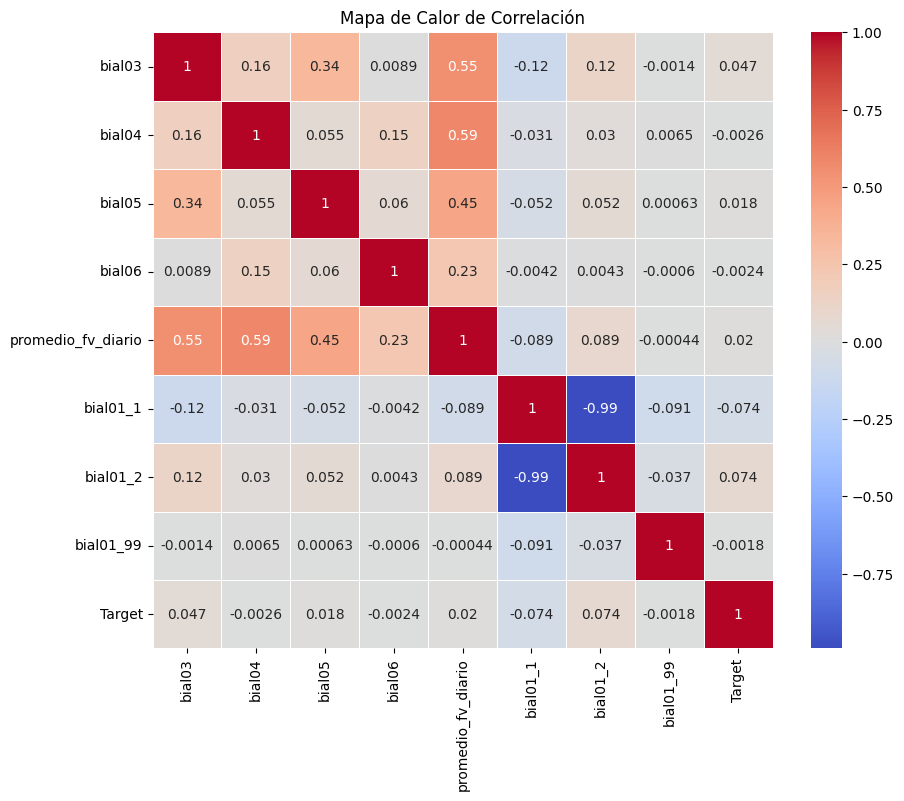

In [ ]:
# Matriz de correlación
# Selecciona las columnas de interés
Hábitos_alimentación= ["bial03", "bial04", "bial05","bial06","promedio_fv_diario",
                       "bial01_1","bial01_2","bial01_99","Target"]
datos_de_interes_4 = df[Hábitos_alimentación]

# Calcula la matriz de correlación
matriz_de_correlacion = datos_de_interes_4.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Personaliza el título del mapa de calor
plt.title('Mapa de Calor de Correlación')

# Muestra el mapa de calor
plt.show()

**Consumo de tabaco y alcohol**

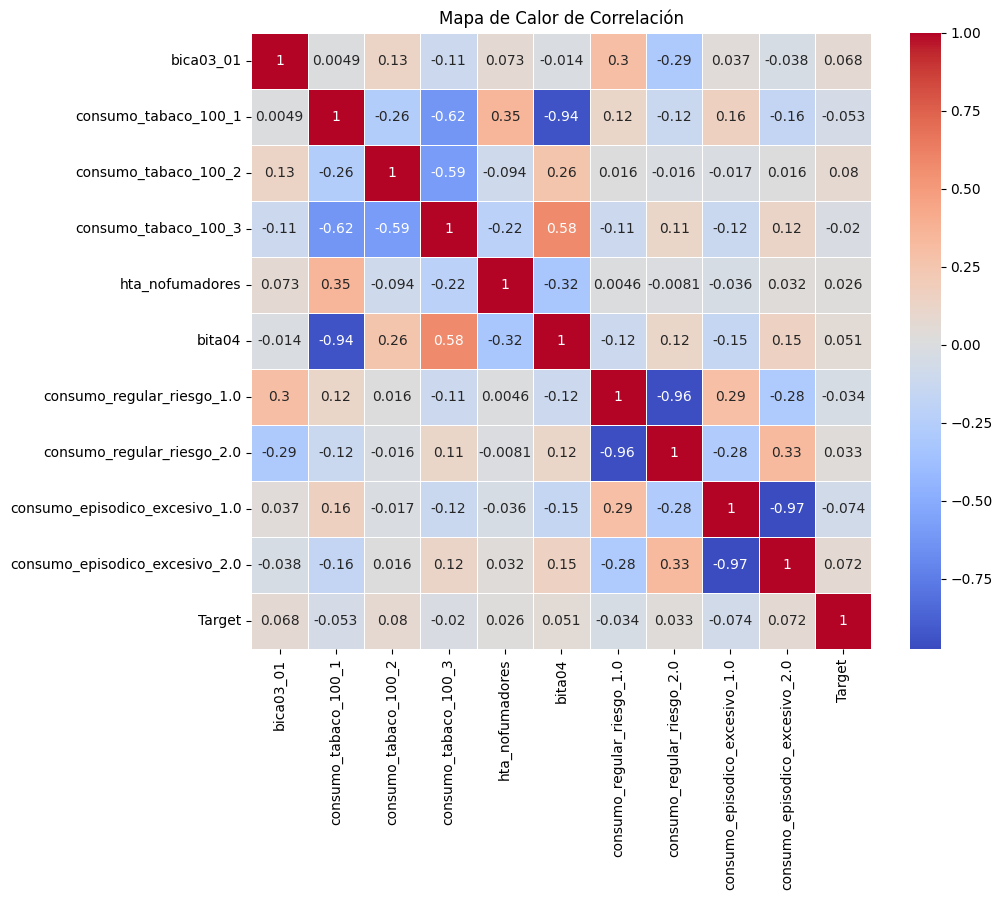

In [ ]:
# Matriz de correlación
# Selecciona las columnas de interés
Hábitos_Alcohol_Tabaco=["bica03_01", "consumo_tabaco_100_1", "consumo_tabaco_100_2","consumo_tabaco_100_3",
                        "hta_nofumadores", "bita04","consumo_regular_riesgo_1.0","consumo_regular_riesgo_2.0",
                        "consumo_episodico_excesivo_1.0","consumo_episodico_excesivo_2.0","Target"]

datos_de_interes_5 = df[Hábitos_Alcohol_Tabaco]

# Calcula la matriz de correlación
matriz_de_correlacion = datos_de_interes_5.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Personaliza el título del mapa de calor
plt.title('Mapa de Calor de Correlación')

# Muestra el mapa de calor
plt.show()

No pudimos identificar correlaciones significativas entre las variables vinculadas a los hábitos de las personas y la enfermedad no transmisible de la diabetes. Esto podría deberse a que las personas ya están diagnosticadas o son conscientes de su riesgo de desarrollar la enfermedad, lo que podría llevarlas a adoptar hábitos más saludables. Otra posible explicación es la falta de información sobre la duración de la exposición a los factores de riesgo, ya que la encuesta no permitió determinar cuánto tiempo las personas estuvieron expuestas a estos factores.

---



**Variables sociales**

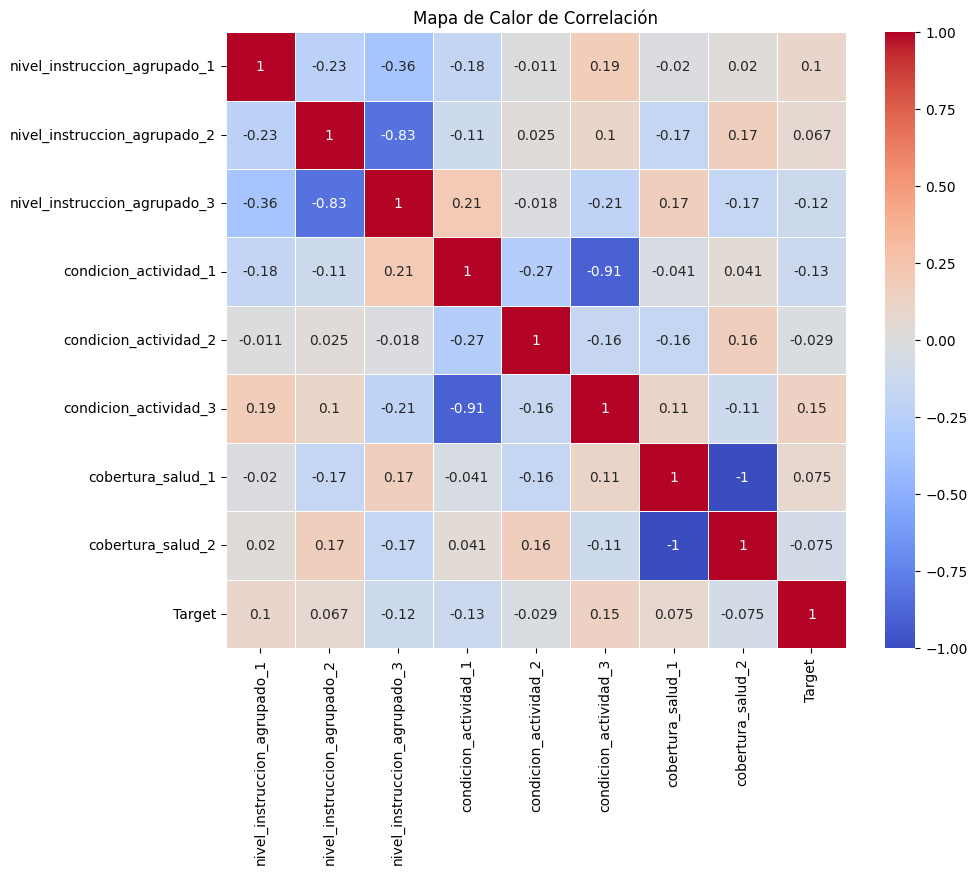

In [ ]:
# Matriz de correlación
# Selecciona las columnas de interés
variables_sociales= ['nivel_instruccion_agrupado_1', 'nivel_instruccion_agrupado_2','nivel_instruccion_agrupado_3',"condicion_actividad_1",
                    "condicion_actividad_2", "condicion_actividad_3","cobertura_salud_1", "cobertura_salud_2","Target"]
datos_de_interes_6 = df[variables_sociales]

# Calcula la matriz de correlación
matriz_de_correlacion = datos_de_interes_6.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Personaliza el título del mapa de calor
plt.title('Mapa de Calor de Correlación')

# Muestra el mapa de calor
plt.show()

`nivel_instruccion_agrupado`:
* `nivel_instruccion_agrupado_1`: Hasta primario incompleto (incluye educación especial) ---0:No 1:Si
* `nivel_instruccion_agrupado_2`: Hasta secundario incompleto ---0:No 1:Si
* `nivel_instruccion_agrupado_3`: Secundario completo y más ---0:No 1:Si

In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['nivel_instruccion_agrupado_3'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target                                0          1          2
nivel_instruccion_agrupado_3                                 
0.0                           64.739439  18.755782  16.504780
1.0                           76.747477  12.281565  10.970957


In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['nivel_instruccion_agrupado_1'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target                                0          1          2
nivel_instruccion_agrupado_1                                 
0.0                           72.920434  14.413803  12.665763
1.0                           56.529851  22.500000  20.970149


<Figure size 800x600 with 0 Axes>

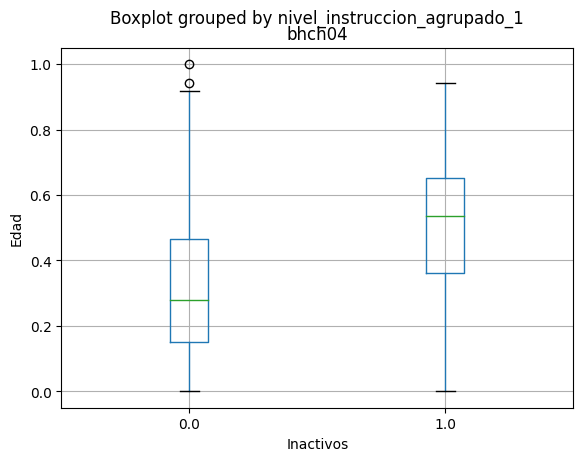

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='bhch04', by='nivel_instruccion_agrupado_1')

plt.xlabel('Inactivos')
plt.ylabel('Edad')

plt.show()

A partir de nuestras observaciones, podemos concluir que existe una correlación entre el nivel educativo y la incidencia de riesgo o diagnóstico de esta enfermedad. Esto podría estar relacionado con la influencia de la edad en la prevalencia de esta enfermedad. Es posible que muchas personas que presentan riesgo o han sido diagnosticadas no hayan completado sus estudios, quizás debido a que en el pasado no era tan común finalizar la educación formal.

`condicion_actividad`:
* `condicion_actividad_1`: Ocupado --- 0:No 1:Si
* `condicion_actividad_2`: Desocupado --- 0:No 1:Si
* `condicion_actividad_3`: Inactivo --- 0:No 1:Si

In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['condicion_actividad_1'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target                         0          1          2
condicion_actividad_1                                 
0.0                    64.105227  18.319488  17.575286
1.0                    76.199909  13.085805  10.714286


In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['condicion_actividad_2'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target                         0          1          2
condicion_actividad_2                                 
0.0                    71.048289  15.437325  13.514386
1.0                    79.037037   9.333333  11.629630


In [ ]:
#Analisis por FILAS
# Tabla de contingencia
contingency_table = pd.crosstab(df['condicion_actividad_3'], df['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100
print(contingency_table_porcentajes_filas)

Target                         0          1          2
condicion_actividad_3                                 
0.0                    76.401304  12.819434  10.779262
1.0                    62.130120  19.508132  18.361748


Analizamos la relación entre la edad y la condición inactividad.

<Figure size 800x600 with 0 Axes>

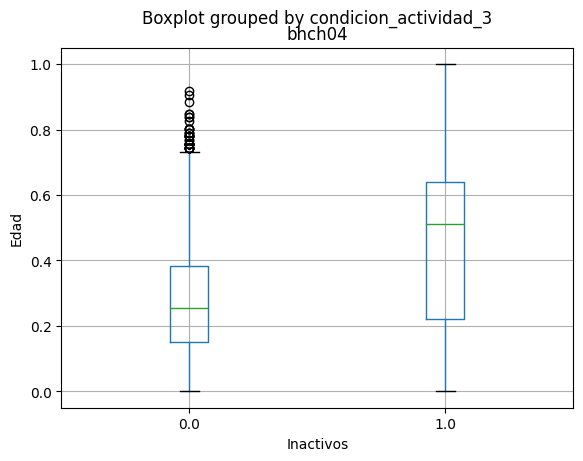

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='bhch04', by='condicion_actividad_3')

plt.xlabel('Inactivos')
plt.ylabel('Edad')

plt.show()

Nuevamente, hay una mayor relación cuando las personas se encuentran *Inactivas* ya que se consideran jubiladas o retiradas y esto tiene que ver con la edad.

---



# **MODELOS UTILIZADOS**

---

En nuestro contexto específico, optamos por enfocarnos en el estudio de enfermedades no transmisibles y, en consecuencia, realizamos una selección cuidadosa de variables en el conjunto de datos, eligiendo aquellas que presumíamos estar más estrechamente relacionadas con nuestro objetivo de investigación.

A partir del análisis del conjunto de datos curado, tomamos la decisión de llevar a cabo experimentos utilizando tanto modelos de aprendizaje supervisado como no supervisado. Estos experimentos involucraron tanto el conjunto de datos curado completo como otro conjunto de datos que exhibió una correlación más significativa con nuestra variable objetivo.


---

##MEZCLA DE GAUSSIANAS

In [ ]:
# Lista de nombres de columnas que deseas seleccionar
column_names = ['bhch03_1', 'bhch04', 'nivel_actividad_fisica_3.0', 'biaf01', 'imc', 'bima10', 'bima07','bimq06',
                 'imc_bima','bipc01_1','imc_categorias_3', 'bimq05', 'bico03_1', 'control_diabetes_1','Target']
# Crear un nuevo DataFrame con las columnas seleccionadas
df_mejor_corr = df[column_names]
df_GMM = df_mejor_corr.copy()
n=10000 #cantidad de observaciones
df_GMM=df_GMM.loc[:n] #se reduce la base a los n primeras observaciones

In [ ]:
np.shape(df_GMM)

(10001, 15)

In [ ]:
# Mezcla de Gaussianas
gmm = GaussianMixture(n_components=3,covariance_type='full', random_state=1)
df_GMM['gmm_cluster_full'] = gmm.fit_predict(df_GMM)

gmm = GaussianMixture(n_components=3,covariance_type='tied', random_state=1)
df_GMM['gmm_cluster_tied'] = gmm.fit_predict(df_GMM)

gmm = GaussianMixture(n_components=3,covariance_type='diag', random_state=1)
df_GMM['gmm_cluster_diag'] = gmm.fit_predict(df_GMM)

gmm = GaussianMixture(n_components=3,covariance_type='spherical', random_state=1)
df_GMM['gmm_cluster_spherical'] = gmm.fit_predict(df_GMM)

# Imprime el número de clusters únicos encontrados por la Mezcla de Gaussianas
#num_gmm_clusters = len(data['gmm_cluster'].unique())
#print(f"Número de clusters Mezcla de Gaussianas: {num_gmm_clusters}")

In [ ]:
df_GMM.tail(3)

,bhch03_1,bhch04,nivel_actividad_fisica_3.0,biaf01,imc,bima10,bima07,bimq06,imc_bima,bipc01_1,imc_categorias_3,bimq05,bico03_1,control_diabetes_1,Target,gmm_cluster_full,gmm_cluster_tied,gmm_cluster_diag,gmm_cluster_spherical
9998,0.0,0.197674,0.0,0.428571,0.163972,0.143713,0.505747,0.180000,0.120409,0.0,0.0,0.157459,0.0,1.0,0,1,2,2,1
9999,0.0,0.255814,1.0,0.000000,0.259726,0.257485,0.505747,0.126667,0.224938,0.0,0.0,0.131215,1.0,1.0,1,0,0,0,0
10000,1.0,0.011628,0.0,1.000000,0.465624,0.287425,0.724138,0.463333,0.160591,1.0,1.0,0.250000,0.0,1.0,0,1,2,2,1


In [ ]:
df_GMM.gmm_cluster_full.unique()

array([1, 0, 2])

In [ ]:
num_gmm_clusters = len(df_GMM['gmm_cluster_spherical'].unique())
print(f"Número de clusters Mezcla de Gaussianas: {num_gmm_clusters}")

Número de clusters Mezcla de Gaussianas: 3


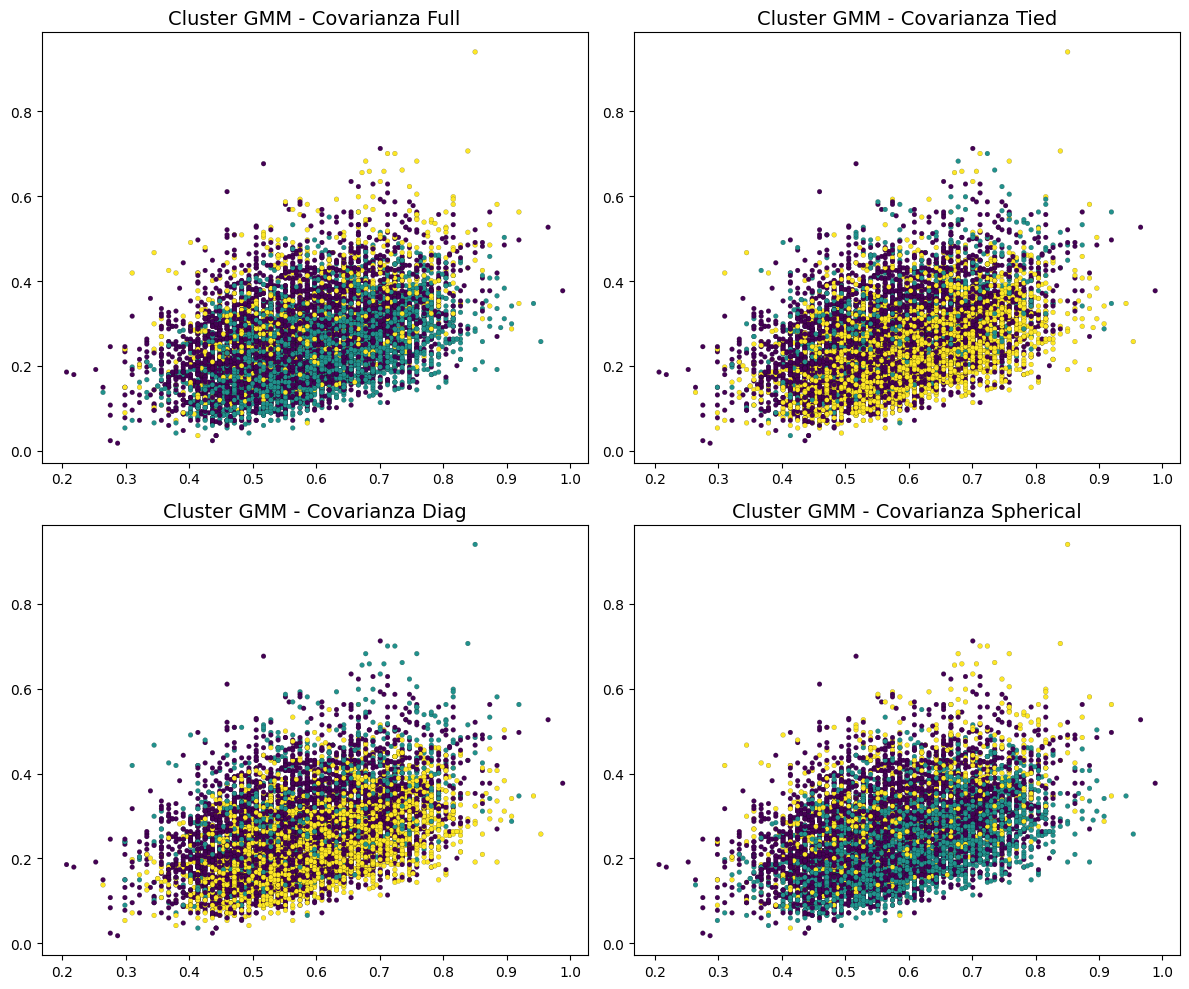

In [ ]:
# Crear una matriz de subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Graficar en el primer subplot y agregar título
scatter1 = axes[0, 0].scatter(df_GMM['bima07'], df_GMM['bima10'], c=df_GMM['gmm_cluster_full'], cmap='viridis', s=12, edgecolors='black', linewidths=0.1)
axes[0, 0].set_title('Cluster GMM - Covarianza Full', fontsize=14)

# Graficar en el segundo subplot y agregar título
scatter2 = axes[0, 1].scatter(df_GMM['bima07'], df_GMM['bima10'], c=df_GMM['gmm_cluster_tied'], cmap='viridis', s=12, edgecolors='black', linewidths=0.1)
axes[0, 1].set_title('Cluster GMM - Covarianza Tied', fontsize=14)

# Graficar en el tercer subplot y agregar título
scatter3 = axes[1, 0].scatter(df_GMM['bima07'], df_GMM['bima10'], c=df_GMM['gmm_cluster_diag'], cmap='viridis', s=12, edgecolors='black', linewidths=0.1)
axes[1, 0].set_title('Cluster GMM - Covarianza Diag', fontsize=14)

# Graficar en el cuarto subplot y agregar título
scatter4 = axes[1, 1].scatter(df_GMM['bima07'], df_GMM['bima10'], c=df_GMM['gmm_cluster_spherical'], cmap='viridis', s=12, edgecolors='black', linewidths=0.1)
axes[1, 1].set_title('Cluster GMM - Covarianza Spherical', fontsize=14)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [ ]:
#CATEGORICA bipc01_1: Estas haciendo algo para mantener controlado su peso?
# Gráfico 3D:
fig = px.scatter_3d (df_GMM, x= 'bhch04', y= 'bipc01_1', z= 'imc_bima', color = df_GMM['gmm_cluster_tied'])
fig.update_layout (showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#ff0000',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#ff0000',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black',
                                        gridcolor='#ff0000',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))

fig.show(renderer="colab")

El análisis de clustering realizado no ha proporcionado una separación clara y significativa entre los clusters, ni ha revelado información relevante para la selección de variables. Los resultados no muestran una estructura distintiva en los datos que permita agruparlos de manera coherente o identificar variables predictoras destacadas. Esto sugiere que los modelos de aprendizaje no supervisado pueden no ser adecuados para este conjunto de datos en particular.

##RED NEURONAL

###DF COLUMNAS SELECCIONADAS


In [ ]:
# Lista de nombres de columnas que deseas seleccionar
column_names = ['bhch03_1', 'bhch04', 'nivel_actividad_fisica_3.0', 'biaf01', 'imc', 'bima10', 'bima07','bimq06',
                 'imc_bima','bipc01_1','imc_categorias_3', 'bimq05', 'bico03_1', 'control_diabetes_1','Target']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_mejor_corr = df[column_names]

In [ ]:
df_NET_2 = df_mejor_corr.copy()

In [ ]:
columns_to_encode=['Target']
df_NET_2 = pd.get_dummies(df_NET_2, columns=columns_to_encode)

In [ ]:
df_NET_2.head(3)

,bhch03_1,bhch04,nivel_actividad_fisica_3.0,biaf01,imc,bima10,bima07,bimq06,imc_bima,bipc01_1,imc_categorias_3,bimq05,bico03_1,control_diabetes_1,Target_0,Target_1,Target_2
0,1.0,0.162791,0.0,0.571429,0.379641,0.437126,0.770115,0.113333,0.251450,1.0,1.0,0.225138,0.0,1.0,1,0,0
1,0.0,0.546512,0.0,0.428571,0.266655,0.236527,0.574713,0.063333,0.177161,0.0,0.0,0.129834,1.0,1.0,1,0,0
2,0.0,0.174419,0.0,0.000000,0.134837,0.131737,0.528736,0.196667,0.101215,0.0,0.0,0.128453,0.0,1.0,1,0,0


In [ ]:
X = df_NET_2.drop(['Target_0', 'Target_1', 'Target_2'], axis=1)
y = df_NET_2[['Target_0', 'Target_1', 'Target_2']]

In [ ]:
#DIVIDIMOS EN TRAIN, VALID Y TEST

# Primero, divide tus datos en entrenamiento (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Luego, divide el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ahora, tienes X_train, y_train para entrenamiento, X_val, y_val para validación y X_test, y_test para pruebas.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(18703, 14)
(18703, 3)


In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
# Definir la cantidad de entradas y capas ocultas
input_size = 14  # Cambia esto al número de entradas que desees

hidden_layer_sizes = [20, 10, 5]  # Puedes modificar esto para cambiar el número y tamaño de las capas ocultas
#[cantidad de neuronas en capa_oculta_1, cantidad de neuronas en capa_oculta_2, .........]
# Crear el modelo secuencial de TensorFlow

custom_lr = 0.007 # Tasa de aprendizaje personalizada
custom_l2 = 0.015 # Regularización L2 a las capas densas de las capas intermedias

model_1 = tf.keras.Sequential()

# Capa de entrada
model_1.add(tf.keras.layers.Input(shape=(input_size,)))

# Capas ocultas intermedias
for layer_size in hidden_layer_sizes:
    model_1.add(tf.keras.layers.Dense(layer_size, activation='gelu', kernel_regularizer=l2(custom_l2), kernel_initializer=GlorotNormal()))

# Capa de salida
model_1.add(tf.keras.layers.Dense(3, activation='softmax'))  # 3 salidas en este ejemplo

# Compilar el modelo
#optimizer = Adam(learning_rate=custom_lr)
optimizer = SGD(learning_rate=custom_lr, momentum=0.9)
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 20)                300       
                                                                 
 dense_20 (Dense)            (None, 10)                210       
                                                                 
 dense_21 (Dense)            (None, 5)                 55        
                                                                 
 dense_22 (Dense)            (None, 3)                 18        
                                                                 
Total params: 583 (2.28 KB)
Trainable params: 583 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
188/188 [==============================] - 2s 8ms/step - loss: 1.1986 - accuracy: 0.7122 - val_loss: 1.0435 - val_accuracy: 0.7117
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.9588 - accuracy: 0.7177 - val_loss: 0.9112 - val_accuracy: 0.7117
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.8680 - accuracy: 0.7177 - val_loss: 0.8524 - val_accuracy: 0.7117
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.8272 - accuracy: 0.7177 - val_loss: 0.8259 - val_accuracy: 0.7117
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.8087 - accuracy: 0.7177 - val_loss: 0.8132 - val_accuracy: 0.7117
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.7997 - accuracy: 0.7177 - val_loss: 0.8072 - val_accuracy: 0.7117
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.7954 - accuracy: 0.7177 - val_loss: 0.8048 - val_accuracy: 0.7117

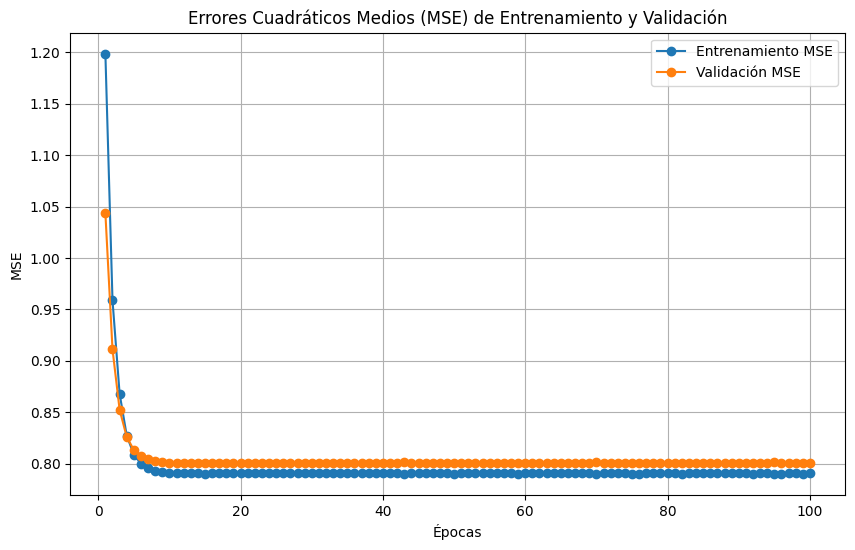

In [ ]:
# Entrenamiento de la red neuronal
epochs = 100  # Número de épocas de entrenamiento (ajusta según sea necesario)
batch_size = 100  # Tamaño del lote de entrenamiento (ajusta según sea necesario)

# Obtener el historial del entrenamiento
history = model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Extraer los valores de MSE de entrenamiento y prueba del historial
train_mse = history.history['loss']
val_mse = history.history['val_loss']

# Crear una lista de épocas para el eje x del gráfico
epochs_list = range(1, epochs + 1)

# Graficar los errores cuadráticos medios de entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(epochs_list, train_mse, label='Entrenamiento MSE', marker='o')
plt.plot(epochs_list, val_mse, label='Validación MSE', marker='o')
plt.title('Errores Cuadráticos Medios (MSE) de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluación del modelo (opcional)
# Si tienes datos de prueba, puedes evaluar el rendimiento del modelo de la siguiente manera:
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

183/183 [==============================] - 1s 3ms/step - loss: 0.8108 - accuracy: 0.7049
Loss: 0.810802161693573, Accuracy: 0.7048759460449219


###DF COMPLETO

In [ ]:
df_NET = df.copy()

In [ ]:
df_NET=df_NET.drop(columns=['findrisc','bidi01','bidi02','bidi05'])

In [ ]:
columns_to_encode=['Target']
df_NET = pd.get_dummies(df_NET, columns=columns_to_encode)

In [ ]:
df_NET.head(3)

,cant_componentes,bhih01,bhch04,biaf01,biaf03,biaf05,biaf06_m,biaf07_m,biha03,imc,...,control_diabetes_1,control_diabetes_2,control_diabetes_99,bipc03,hta_nofumadores,imc_categorias_bima,bita04,Target_0,Target_1,Target_2
0,0.071429,0.119048,0.162791,0.571429,0.571429,1.0,0.057654,0.331241,3.0,0.379641,...,1.0,0.0,0.0,2.0,2.0,3.0,3.0,1,0,0
1,0.142857,0.095238,0.546512,0.428571,0.142857,1.0,0.033797,0.414923,3.0,0.266655,...,1.0,0.0,0.0,1.0,1.0,2.0,3.0,1,0,0
2,0.071429,0.095238,0.174419,0.000000,0.428571,1.0,0.051690,0.373082,3.0,0.134837,...,1.0,0.0,0.0,2.0,1.0,2.0,3.0,1,0,0


In [ ]:
X = df_NET.drop(['Target_0', 'Target_1', 'Target_2'], axis=1)
y = df_NET[['Target_0', 'Target_1', 'Target_2']]

In [ ]:
#DIVIDIMOS EN TRAIN, VALID Y TEST
from sklearn.model_selection import train_test_split

# Primero, divide tus datos en entrenamiento (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Luego, divide el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ahora, tienes X_train, y_train para entrenamiento, X_val, y_val para validación y X_test, y_test para pruebas.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(18703, 68)
(18703, 3)


In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
# Definir la cantidad de entradas y capas ocultas
input_size = 68  # Cambia esto al número de entradas que desees

hidden_layer_sizes = [10, 5]  # Puedes modificar esto para cambiar el número y tamaño de las capas ocultas
#[cantidad de neuronas en capa_oculta_1, cantidad de neuronas en capa_oculta_2, .........]
# Crear el modelo secuencial de TensorFlow

custom_lr = 0.007 # Tasa de aprendizaje personalizada
custom_l2 = 0.015 # Regularización L2 a las capas densas de las capas intermedias

model = tf.keras.Sequential()

# Capa de entrada
model.add(tf.keras.layers.Input(shape=(input_size,)))

# Capas ocultas intermedias
for layer_size in hidden_layer_sizes:
    model.add(tf.keras.layers.Dense(layer_size, activation='relu', kernel_regularizer=l2(custom_l2), kernel_initializer=GlorotNormal()))

# Capa de salida
model.add(tf.keras.layers.Dense(3, activation='softmax'))  # 3 salidas en este ejemplo

# Compilar el modelo
optimizer = Adam(learning_rate=custom_lr)
#optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                690       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
Total params: 763 (2.98 KB)
Trainable params: 763 (2.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
188/188 [==============================] - 4s 10ms/step - loss: 0.8283 - accuracy: 0.7141 - val_loss: 0.7374 - val_accuracy: 0.7117
Epoch 2/100
188/188 [==============================] - 2s 8ms/step - loss: 0.7137 - accuracy: 0.7229 - val_loss: 0.7308 - val_accuracy: 0.7104
Epoch 3/100
188/188 [==============================] - 2s 8ms/step - loss: 0.6925 - accuracy: 0.7386 - val_loss: 0.6930 - val_accuracy: 0.7412
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.6893 - accuracy: 0.7428 - val_loss: 0.6911 - val_accuracy: 0.7440
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.6799 - accuracy: 0.7472 - val_loss: 0.6898 - val_accuracy: 0.7361
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.6753 - accuracy: 0.7477 - val_loss: 0.6891 - val_accuracy: 0.7318
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.6715 - accuracy: 0.7515 - val_loss: 0.6776 - val_accuracy: 0.746

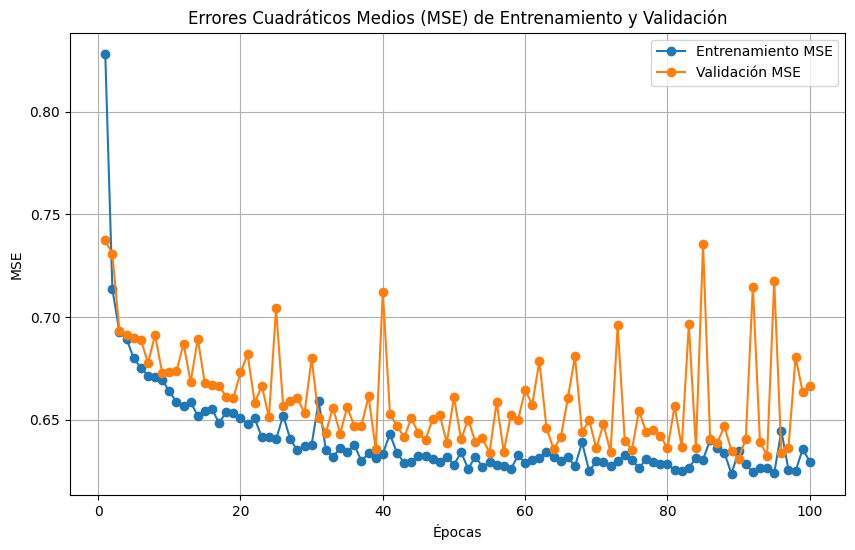

In [ ]:
# Crear y entrenar tu modelo aquí (asegúrate de que el modelo ya haya sido entrenado)

# Entrenamiento de la red neuronal
epochs = 100  # Número de épocas de entrenamiento (ajusta según sea necesario)
batch_size = 100  # Tamaño del lote de entrenamiento (ajusta según sea necesario)

# Obtener el historial del entrenamiento
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Extraer los valores de MSE de entrenamiento y prueba del historial
train_mse = history.history['loss']
val_mse = history.history['val_loss']

# Crear una lista de épocas para el eje x del gráfico
epochs_list = range(1, epochs + 1)

# Graficar los errores cuadráticos medios de entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(epochs_list, train_mse, label='Entrenamiento MSE', marker='o')
plt.plot(epochs_list, val_mse, label='Validación MSE', marker='o')
plt.title('Errores Cuadráticos Medios (MSE) de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluación del modelo (opcional)
# Si tienes datos de prueba, puedes evaluar el rendimiento del modelo de la siguiente manera:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

183/183 [==============================] - 1s 3ms/step - loss: 0.6812 - accuracy: 0.7340
Loss: 0.6812236309051514, Accuracy: 0.7339606285095215


CONLUSION:
Al seleccionar las variables con mayor ponderancia desde nuestra perspectiva se logra un mejor entrenamiento en la red neuronal. Esto se debe a que tenemos variables que introducen ruido al algoritmo, como podemos denotarlo al entrenar la misma red neuronal con las columnas seleccionadas y el df completo. El df completo tiende a sobreajustar a los datos de entrenamiento y observamos repetidas fluctuaciones durante su aprendizaje en las epocas.

##RANDOM FOREST

###COLUMNAS SELECCIONADAS

In [ ]:
# Lista de nombres de columnas que deseas seleccionar
column_names = ['bhch03_1', 'bhch04', 'nivel_actividad_fisica_3.0', 'biaf01', 'imc', 'bima10', 'bima07','bimq06',
                 'imc_bima','bipc01_1','imc_categorias_3', 'bimq05', 'bico03_1', 'control_diabetes_1','Target']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_mejor_corr = df[column_names]

In [ ]:
df_GMM = df_mejor_corr.copy()
n=5000 #cantidad de jugadores a considerar
df_RF=df_GMM.loc[:n] #se reduce la base a los n primeros jugadores

In [ ]:
X = df_RF.drop(['Target'], axis=1)
y = df_RF[['Target']]

In [ ]:
# Primero, divide tus datos en entrenamiento (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = y_train['Target'].values.ravel()
print(X_train.shape)
print(y_train.shape)

(4000, 14)
(4000,)


In [ ]:
clf = ensemble.RandomForestClassifier(n_estimators=10, max_features = None, random_state=2)
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=10, random_state=2)

In [ ]:
param_grid = {"criterion":["log_loss","gini",'entropy'], "min_samples_leaf" : [ 5, 10, 20], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100],'max_depth':[5,10,20]}
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy')
gs = gs.fit(X_train, y_train)

In [ ]:
print(gs.best_score_)
print(gs.best_params_)

0.754
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 100}


In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = gs.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Random Forest:", accuracy)

Precisión del modelo Random Forest: 0.7472527472527473


Al ser un algoritmo con mayor gasto computacional se decidio realizar el entrenamiento solo con las variables que determinamos mas relevantes.

## **SVM**

###DF COMPLETO

In [ ]:
df_SVM = df.copy()
df_SVM=df_SVM.drop(columns=['findrisc','bidi01','bidi02','bidi05'])

In [ ]:
df_SVM.head(3)

,cant_componentes,bhih01,bhch04,biaf01,biaf03,biaf05,biaf06_m,biaf07_m,biha03,imc,...,bidi06_02_2,bidi06_02_99,control_diabetes_1,control_diabetes_2,control_diabetes_99,bipc03,hta_nofumadores,imc_categorias_bima,bita04,Target
0,0.071429,0.119048,0.162791,0.571429,0.571429,1.0,0.057654,0.331241,3.0,0.379641,...,1.0,0.0,1.0,0.0,0.0,2.0,2.0,3.0,3.0,0
1,0.142857,0.095238,0.546512,0.428571,0.142857,1.0,0.033797,0.414923,3.0,0.266655,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,0
2,0.071429,0.095238,0.174419,0.000000,0.428571,1.0,0.051690,0.373082,3.0,0.134837,...,1.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,3.0,0


In [ ]:
X = df_SVM.drop("Target", axis=1)
y = df_SVM["Target"]

In [ ]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crea un modelo SVM
svm_model = SVC(kernel="poly", degree = 4, random_state=26)

# Entrena el modelo SVM en el conjunto de entrenamiento
svm_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", accuracy)

Precisión del modelo SVM: 0.7117194183062446


###DF CON COLUMNAS SELECCIONADAS

In [ ]:
# Lista de nombres de columnas que deseas seleccionar
column_names = ['bhch03_1', 'bhch04', 'nivel_actividad_fisica_3.0', 'biaf01', 'imc', 'bima10', 'bima07','bimq06',
                 'imc_bima','bipc01_1','imc_categorias_3', 'bimq05', 'bico03_1', 'control_diabetes_1','Target']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_mejor_corr = df[column_names]

In [ ]:
df_SVM_2 = df_mejor_corr.copy()
X = df_SVM_2.drop("Target", axis=1)
y = df_SVM_2["Target"]

In [ ]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crea un modelo SVM
svm_model = SVC(kernel="poly", degree = 4, random_state=26)  # Puedes ajustar el kernel según tus necesidades

# Entrena el modelo SVM en el conjunto de entrenamiento
svm_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", accuracy)

Precisión del modelo SVM: 0.7147989734816083


In [ ]:
print(X_test.shape)
print(y_test.shape)

(5845, 14)
(5845, 3)


In [ ]:
pred = gs.predict(X_test)
pred = pred.reshape(-1, 1)
print(pred.shape)

(5845, 1)


#CONCLUSION

---
Precisiones de los modelos con los dataframe que poseen las variables seleccionadas de mayor correlacion y relevancia para el analisis.

**RED NEURONAL**

Precisión del modelo Red Neuronal: 0.7048

**RANDOM FOREST**

Precisión del modelo Random Forest: 0.7472

**SVM**

Precisión del modelo SVM: 0.7117

Los modelos en gral no alcanzaron las expectativas esperadas por el grupo de trabajo ya que tuvieron un bajo rendimiento en las métricas de evaluación (accuracy). Todos los modelos tuvieron un desempeño similar. El que presento mayor precision, sobre los datos de testeo, fue el modelo de Random Forest.

---

---
**CONCLUSION:**

Las encuestas representan herramientas fundamentales en la realización de estudios epidemiológicos de naturaleza transversal. Sin embargo, una de sus principales limitaciones reside en la posibilidad de obtener datos sesgados o inadecuados para abordar ciertos problemas específicos. En nuestro contexto particular, al emprender la creación de un modelo predictivo para enfermedades no transmisibles, nos enfrentamos a diversos desafíos.

En primer lugar, observamos que en la encuesta previamente realizada, solo se incluyó la variable de diabetes, y, además, la cantidad de pacientes diagnosticados fue limitada. Esto plantea un obstáculo significativo al intentar establecer un modelo robusto para predecir enfermedades no transmisibles de manera precisa.

Adicionalmente, al tratar de relacionar los hábitos de vida de la población argentina con estas enfermedades, nos dimos cuenta de que la encuesta carecía de preguntas específicas que permitieran determinar el período de exposición de las personas a los distintos factores de riesgo asociados a los malos hábitos que podrían contribuir al desarrollo de enfermedades no transmisibles. Por ejemplo, la encuesta carecia de preguntas fundamentales:

* Variables de tabaco: Cuanto tiempo estuviste en condicion de fumador?; Hace cuanto tiempo dejaste de fumar?
* Variales de diagnostico: Hace cuanto tiempo te diagnosticaron diabetes?.
* Variables comportamentales: Desde que te diagnosticaron hiciste cambios de tu habitos diarios? (comidas, bebidas, ejercicio, etc.).

Es importante reconocer que la encuesta original no fue diseñada con la finalidad de abordar estos aspectos, lo cual es comprensible. No obstante, en futuros censos y estudios similares, sería recomendable contemplar la formulación de preguntas desde una perspectiva más orientada hacia la utilización de recursos disponibles en el ámbito de la ciencia de datos y el aprendizaje automático. Esto permitiría aprovechar de manera más efectiva la riqueza de información recopilada y mejorar la capacidad de previsión y comprensión de enfermedades no transmisibles en la población.

---